In [3]:
from __future__ import division
from nltk.corpus import stopwords
import pymorphy2
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
import os
import codecs
import numpy as np
from sklearn.cluster import KMeans
from parser import PackToDocks
from itertools import combinations
from udpipe_model import Model
class_list_trump = PackToDocks('trump_labelled.txt', 'data_trump')

class_list_DNR = PackToDocks('lnr_dnr_labelled.txt', 'data_DNR')

In [4]:
def ClearTable(table):
    for i in table:
        if i[0]==i[1]:
            table[i] == False
        else:
            table[i] == 0

def Add(dic, value):
    if value in dic:
        dic[value] +=1
    else:
        dic[value] = 1

def All(dic):
    for i in dic:
        if i[0] == i[1] and dic[i] == False:
            return False
    return True

def GetDict(cluster_list, class_list):
    s = set()
    d = {}
    for x in cluster_list:
        s.add(x)
    for kek in s:
        self_d = {}
        for i in s:
            self_d[i] = 0
        for i in range(len(cluster_list)):
            if cluster_list[i] == kek:
                Add(self_d, class_list[i])
        d[kek] = dict(self_d)
    return d

def Swap(cluster_list, class_list, max_key):
    for i in range(len(cluster_list)):
        if cluster_list[i] == max_key[0]:
            cluster_list[i] = max_key[1]
        elif cluster_list[i] == max_key[1]:
            cluster_list[i] = max_key[0]
            
def CPS(cluster_list, class_list):
    s = set()
    for x in cluster_list:
        s.add(x)
    table = {}
    for i in combinations(list(s), 2):
        table[i] = 0
    for i in s:
        table[(i, i)] = False
    while True:
        d = GetDict(cluster_list, class_list)
        for line in table:
            if line[0] != line[1]:
                table[line] = d[line[0]][line[1]] + d[line[1]][line[0]]
            else:
                table[line] = d[line[0]][line[1]]
        max_key = None
        for line in table:
            if table[line] > table[(line[0], line[0])] + table[(line[1], line[1])]:
                if max_key == None:
                    max_key = line
                elif table[max_key] < table[line]:
                    max_key = line
        if max_key == None:
            break
        else:
            Swap(cluster_list, class_list, max_key)

    counter = 0
    for i,x in enumerate(class_list):
        if x == cluster_list[i]:
            counter += 1
    return counter/len(class_list)


def Clustering(data_path, dimension, n_clusters):
    cluster_list = []
    file_list = [file for file in os.listdir(data_path) if os.path.isfile(data_path + '/' + file)]
    file_list.sort(key = lambda x: int(x[2:-4]))
    vecs = np.zeros(shape = (len(file_list), dimension))
    stopword_set = set(stopwords.words('russian') + [u'тот', u'этот', u'он', u'она', u'оно', u'наш', u'ваш', u'это', u'быть'])
    morph = pymorphy2.MorphAnalyzer()
    files = []
    for i, file in enumerate(file_list):
        with codecs.open(data_path + '/' + file, 'r', 'utf-8') as f:
            words = nltk.word_tokenize(f.read())
            words = [morph.parse(word.lower())[0].normal_form for word in words if word.isalpha() and word.lower() not in stopword_set]
            tag = TaggedDocument(words,[i])
            files.append(tag)
    
    model = Doc2Vec(files, size=dimension, window=2, min_count=1, workers=4, dm = 1)
    for i in range(len(file_list)):
        vecs[i] = model.docvecs[i]
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(vecs)
    
    return kmeans.labels_
    
def PWS(class_list, cluster_list):
    PW = 0
    counter = 0
    for i, x in enumerate(class_list):
        for j, y in enumerate(class_list):
            if x == y:
                counter += 1
                PW += int(cluster_list[i] == cluster_list[j])

    return (PW/counter)
    
    

In [160]:
cluster_list_DNR = Clustering('data_DNR', 25, 3)
cluster_list_trump = Clustering('data_trump', 25, 3)

In [37]:
for i in range(len(class_list_DNR)):
    if class_list_DNR[i] == 9:
        class_list_DNR[i] = 0
print 'TRUMP PWS: ' + str(PWS(class_list = class_list_trump, cluster_list = cluster_list_trump))
print 'DNR PWS: ' + str(PWS(class_list = class_list_DNR, cluster_list = cluster_list_DNR))
print '========================================='
print 'TRUMP CPS: ' + str(CPS(class_list = class_list_trump, cluster_list = cluster_list_trump))
print 'DNR CPS: ' + str(CPS(class_list = class_list_DNR, cluster_list = cluster_list_DNR))

TRUMP PWS: 0.465028665029
DNR PWS: 0.382984818104
TRUMP CPS: 0.402714932127
DNR CPS: 0.424242424242


In [170]:
print 'TRUMP: ', class_list_trump
print cluster_list_trump

print 'DNR: ', class_list_DNR
print cluster_list_DNR



TRUMP:  [0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1]
[2 2 2 1 2 1 2 2 2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 0 2 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 2 1 1 0 2 1 1 1 2 1 0 2 1
 1 2 2 1 1 1 2 2 2 0 0 0 0 0 1 1 1 1 0 0 1 1 1 2 2 0 0 1 2 2 2 1 2 2 1 1 2
 2 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 1 2 1 2 2 1 1 1 1 2 2 2 2
 1 1 2 2 2 1 2 2 2 2 2 2 1 1

# Посмотрим как работает Doc2Vec на субъектах или объектах


In [46]:

import nltk
from math import log

def GetFiles(data_path):
    files = []
    model = Model('fi_ud-rus.model')
    file_list = [file for file in os.listdir(data_path) if os.path.isfile(data_path + '/' + file)]
    file_list.sort(key = lambda x: int(x[2:-4]))
    for i, file in enumerate(file_list):
        sentences = model.tokenize(codecs.open(data_path + '/' + file, 'r', 'utf-8').read())
        for s in sentences:
            model.tag(s)
            model.parse(s)
        conllu = model.write(sentences, "conllu")

        flag = False
        deps = []
        dep = []
        for line in conllu.split('\n'):
            if len(line) > 1 and line[0] == '1':
                flag = True
            elif len(line) == 0:
                flag = False
                if dep != []:
                    deps.append(dep)
                    dep = []
            if flag:
                dep.append(line.split('\t'))

        subjects = {}
        objects = {}
        words = []
        for dep in deps:
            adjects = {}
            verbs = {}
            appos = {}
            adjects = {}
            for line in dep:
                if line[3] == 'VERB':
                    verbs[line[0]] = ['0', line[2], '0']
                elif line[3] == 'ADJ':
                    if len(dep[int(line[6])-1]) > 5 and dep[int(line[6])-1][3] == 'NOUN':
                        adjects[line[0]] = [dep[int(line[6])-1][2], '0', line[2]]
            for line in dep:
                if len(line) > 6 and line[7] == 'nsubj':
                    if line[6] in verbs:
                        verbs[line[6]][0] = line[2]
                elif len(line) > 6 and line[7] == 'advmod':
                    if line[6] in verbs:
                        verbs[line[6]][0] = line[2]
                elif len(line) > 6 and (line[7] == 'obj' or line[7] == 'iobj'):
                    if line[6] in verbs:
                        verbs[line[6]][2] = line[2]
                elif len(line) > 6 and line[7] == 'appos':
                    appos[line[0]] = [line[2], '0', dep[int(line[6])-1][2]]
            for key in verbs:
                if verbs[key][0] != '0':
                    Add(objects, verbs[key][0].lower())
                if verbs[key][2] != '0':
                    Add(subjects, verbs[key][2].lower())
            for key in appos:
                if appos[key][0] != '0':
                    Add(objects, appos[key][0].lower())
                if appos[key][2] != '0':
                    Add(subjects, appos[key][2].lower())
            for key in adjects:
                if adjects[key][0] != '0':
                    Add(objects, adjects[key][0].lower())
                if adjects[key][2] != '0':
                    Add(subjects, adjects[key][2].lower())
                    
        for sub in objects:
            for j in range(objects[sub]):
                words.append(sub)
                
        tag = TaggedDocument(words,[i])
        files.append(tag)
    return files
def ClusteringSO(files, dimension, n_clusters):
    model = Doc2Vec(files, size=dimension, window=2, min_count=1, workers=4, dm = 1)
    vecs = np.zeros(shape = (len(files), dimension))
    for i in range(len(files)):
        vecs[i] = model.docvecs[i]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(vecs)
    
    return kmeans.labels_

In [47]:
trump_files = GetFiles('data_trump')
DNR_files = GetFiles('data_DNR')

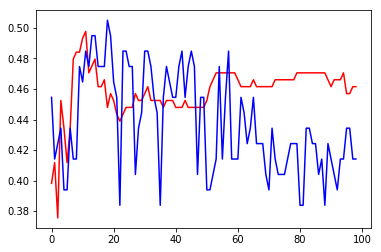

In [48]:
for i, c in enumerate(class_list_DNR):
    if c == 9:
        class_list_DNR[i] = 0
trump_values = []
DNR_values = []
for i in range(1,100):
    cluster_list_DNR = ClusteringSO(DNR_files, i, 3)
    cluster_list_trump = ClusteringSO(trump_files, i, 3)
    
    trump_values.append(CPS(class_list = class_list_trump, cluster_list = cluster_list_trump))
    DNR_values.append(CPS(class_list = class_list_DNR, cluster_list = cluster_list_DNR))
    
GetPlt(trump_values, DNR_values)

<b>Опытным путем выясняется, что Doc2Vec лучше работает на объектах, к тому же показывает лучший результат. По метрике CPS</b>

# Проверим работу Doc2Vec на положительных и отрицательных аспектах

In [381]:
from wiki_ru_wordnet import WikiWordnet
import xlrd
def Add(word, dictionary, score):
    if word in dictionary:
        dictionary[word] += score
    else:
        dictionary[word] = score
        
def Distr(dictionary, pos_dic, neg_dic):
    for word in dictionary:
        if dictionary[word] > 0:
            if word in pos_dic:
                pos_dic[word] +=1
            else:
                pos_dic[word] = 1
        elif dictionary[word] < 0:
            if word in neg_dic:
                neg_dic[word] +=1
            else:
                neg_dic[word] = 1
        
        
def Score(word, wordnet, workbook):
    
    worksheet = workbook.sheet_by_index(0)
    score = 0
    synsets = wordnet.get_synsets(word)
    if bool(synsets):
        synset = synsets[0]
        synlist = [i.lemma() for i in synset.get_words()]
    else:
        synlist = [word]
    #print synlist   
    counter = 0
    for token in synlist:
        flag = False
        for i in range(worksheet.nrows):
            #print 'checking: ' + worksheet.cell(i, 0).value + '==' + token
            if token == worksheet.cell(i, 0).value:
                #print 'WHAT'
                counter +=1
                flag = True
                score += int(worksheet.cell(i, 1).value)
            elif flag:
                break
    if counter:
        score /= counter
    else:
        score = 0
        
    return score

def GetFiles(data_path):
    files = []
    model = Model('fi_ud-rus.model')
    file_list = [file for file in os.listdir(data_path) if os.path.isfile(data_path + '/' + file)]
    file_list.sort(key = lambda x: int(x[2:-4]))
    for i, file in enumerate(file_list):
        sentences = model.tokenize(codecs.open(data_path + '/' + file, 'r', 'utf-8').read())
        for s in sentences:
            model.tag(s)
            model.parse(s)
        conllu = model.write(sentences, "conllu")

        flag = False
        deps = []
        dep = []
        for line in conllu.split('\n'):
            if len(line) > 1 and line[0] == '1':
                flag = True
            elif len(line) == 0:
                flag = False
                if dep != []:
                    deps.append(dep)
                    dep = []
            if flag:
                dep.append(line.split('\t'))

        positive = {}
        negative = {}
        words = []
        wordnet = WikiWordnet()
        workbook = xlrd.open_workbook('full word_rating_after_coding.xlsx')
        for dep in deps:
            #print dep
            dic = {}
            for line in dep:
                #print u' '.join(line)
                score = Score(line[2], wordnet, workbook)
                #print score
                reverse = []
                if score != 0:
                    if (line[3] == 'NOUN'or 'ADJ' or 'ADV') and len(line) > 5:
                         if dep[int(line[6])-1][3] != 'ADP' and dep[int(line[6])-1][3] != 'PUNCT':
                            Add(dep[int(line[6])-1][2], dic, score)
                    elif line[3] == 'VERB': 
                        for l in dep:
                            if len(l) > 5 and dep[int(l[6])-1] == line and (l[7] == 'nsubj' or 'obj'):
                                Add(l[2], dic, score)

            for l in dep:
                if l[2] == u'не' and len(l) > 5 and dep[int(l[6])-1][2] in dic:
                    dic[dep[int(l[6])-1][2]] *= -1
                    #print type(u'не')          
            #print m
            Distr(dictionary = dic, neg_dic = negative, pos_dic = positive)
            
        for pos in negative:
            for j in range(negative[pos]):
                words.append(pos)
                
        tag = TaggedDocument(words,[i])
        files.append(tag)
    return files

def ClusteringPN(files, dimension, n_clusters):
    model = Doc2Vec(files, size=dimension, window=2, min_count=1, workers=4, dm = 1)
    vecs = np.zeros(shape = (len(files), dimension))
    for i in range(len(files)):
        vecs[i] = model.docvecs[i]
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(vecs)
    
    return kmeans.labels_

In [378]:
files_trump_PN = GetFiles('data_DNR')
files_DNR_PN = GetFiles('data_trump')

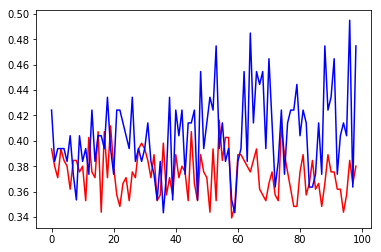

In [394]:
trump_values = []
DNR_values = []
for i in range(1,100):
    cluster_list_DNR = ClusteringPN(files_trump_PN, i, 3)
    cluster_list_trump = ClusteringPN(files_DNR_PN, i, 3)
    
    trump_values.append(CPS(class_list = class_list_trump, cluster_list = cluster_list_trump))
    DNR_values.append(CPS(class_list = class_list_DNR, cluster_list = cluster_list_DNR))
    
GetPlt(trump_values, DNR_values)

# Что, если использовать TF-IDF в наших словарях?

In [34]:
from udpipe_model import Model
import nltk
from math import log
import re
import matplotlib.pyplot as plt
def TF(word, file, morph):
    with codecs.open(file, 'r', 'utf-8') as f:
        text = f.read()
        #print ' '.join(text)
        text = nltk.word_tokenize(text)
        text = [morph.parse(lemm.lower())[0].normal_form for lemm in text if lemm.isalpha()]
        #print ' '.join(text)
        counter = 0
        for l in text:
            if l == morph.parse(word.lower())[0].normal_form:
                counter+=1
    return counter/len(text)

def IDF(word, data_path, morph):
    file_list = [file for file in os.listdir(data_path) if os.path.isfile(data_path + '/' + file)]
    counter = 0
    for file in file_list:
        with codecs.open(data_path + '/' + file, 'r', 'utf-8') as f:
            text = nltk.word_tokenize(f.read())
            text = [morph.parse(w.lower())[0].normal_form for w in text if w.isalpha()]
            if morph.parse(word.lower())[0].normal_form in text:
                #print ' '.join(text)
                counter+=1
                #print word.lower(), ' : ' + file + ' : ' + str(counter)       
    #print 'REPORT: ' + morph.parse(word.lower())[0].normal_form  + ' : ' + str(counter)
    if counter:
        return log(len(file_list)/counter)
    else:
        return 0

def GetPlt(points_1, points_2):
    plt.plot(points_1, color = 'red')
    plt.plot(points_2, color = 'blue')
    plt.show()
    
def TFIDF(word, data_path, file, morph):
    return TF(word, file, morph)*IDF(word, data_path, morph)

def GetFiles(data_path, word_rate):
    files = []
    model = Model('fi_ud-rus.model')
    stopword_set = set(stopwords.words('russian') + [u'тот', u'этот', u'он', u'она', u'оно', u'наш', u'ваш', u'это', u'быть'])
    morph = pymorphy2.MorphAnalyzer()
    file_list = [file for file in os.listdir(data_path) if os.path.isfile(data_path + '/' + file)]
    file_list.sort(key = lambda x: int(x[2:-4]))
    for i, file in enumerate(file_list):
        sentences = model.tokenize(codecs.open(data_path + '/' + file, 'r', 'utf-8').read())
        for s in sentences:
            model.tag(s)
            model.parse(s)
        conllu = model.write(sentences, "conllu")

        flag = False
        deps = []
        dep = []
        for line in conllu.split('\n'):
            if len(line) > 1 and line[0] == '1':
                flag = True
            elif len(line) == 0:
                flag = False
                if dep != []:
                    deps.append(dep)
                    dep = []
            if flag:
                dep.append(line.split('\t'))

        subjects = {}
        objects = {}
        words = []
        for dep in deps:
            adjects = {}
            verbs = {}
            appos = {}
            adjects = {}
            for line in dep:
                if line[3] == 'VERB':
                    verbs[line[0]] = ['0', line[2], '0']
                elif line[3] == 'ADJ':
                    if len(dep[int(line[6])-1]) > 5 and dep[int(line[6])-1][3] == 'NOUN':
                        adjects[line[0]] = [dep[int(line[6])-1][2], '0', line[2]]
            for line in dep:
                if len(line) > 6 and line[7] == 'nsubj':
                    if line[6] in verbs:
                        verbs[line[6]][0] = line[2]
                elif len(line) > 6 and (line[7] == 'obj' or line[7] == 'iobj'):
                    if line[6] in verbs:
                        verbs[line[6]][2] = line[2]
                elif len(line) > 6 and line[7] == 'appos':
                    appos[line[0]] = [line[2], '0', dep[int(line[6])-1][2]]
            for key in verbs:
                if verbs[key][0] != '0':
                    Add(objects, verbs[key][0].lower())
                if verbs[key][2] != '0':
                    Add(subjects, verbs[key][2].lower())
            for key in appos:
                if appos[key][0] != '0':
                    Add(objects, appos[key][0].lower())
                if appos[key][2] != '0':
                    Add(subjects, appos[key][2].lower())
            for key in adjects:
                if adjects[key][0] != '0':
                    Add(objects, adjects[key][0].lower())
                if adjects[key][2] != '0':
                    Add(subjects, adjects[key][2].lower())
        #self = [key for key in objects if key not in stopword_set]
        #self.sort(key = lambda x: TF(file = data_path + '/' + file, word = x, morph = morph), reverse = True)
        for sub in objects:
            for j in range(objects[sub]):
                words.append(sub)
                
        tag = TaggedDocument(words,[i])
        files.append(tag)
    return files

def ClusteringSO(files, dimension, n_clusters):
    model = Doc2Vec(files, size=dimension, window=2, min_count=1, workers=4, dm = 1)
    vecs = np.zeros(shape = (len(files), dimension))
    for i in range(len(files)):
        vecs[i] = model.docvecs[i]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(vecs)
    
    return kmeans.labels_

In [35]:
files_DNR = GetFiles('data_DNR', 20)
files_trump = GetFiles('data_trump', 20)

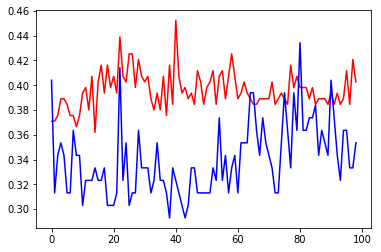

In [36]:
trump_values = []
DNR_values = []
for i in range(1,100):
    cluster_list_DNR = ClusteringSO(files_DNR, i, 3)
    cluster_list_trump = ClusteringSO(files_trump, i, 3)
    
    trump_values.append(CPS(class_list = class_list_trump, cluster_list = cluster_list_trump))
    DNR_values.append(CPS(class_list = class_list_DNR, cluster_list = cluster_list_DNR))
    
GetPlt(trump_values, DNR_values)

# Как работает Word2Vec на тех же данных?

In [7]:
wv = KeyedVectors.load_word2vec_format("../w2v/model_news.bin", binary = True)
wv.init_sims(replace=True)

In [22]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec, KeyedVectors
def GetTag(tag):
    mult = {
        'ADJF': 'ADJ',
        'ADJS': 'ADJ',
        'COMP': 'ADJ',
        'VERB': 'VERB',
        'INFN': 'VERB',
        'PRTF': 'VERB',
        'PRTS': 'VERB',
        'GRND': 'VERB',
        'NUMR': 'NUM',
        'ADVB': 'ADV',
        'NPRO': 'PRON',
        'PRED': 'ADV',
        'PREP': 'ADP',
        'CONJ': 'SCONJ',
        'PRCL': 'CCONJ',
        'INTJ': 'INTJ' 
    }
    for kek in mult:
        if kek in tag:
            return mult[kek]
    return 'NOUN'

def GetDocVectors(data_path, word_rate):
    vectors = []
    model = Model('fi_ud-rus.model')
    stopword_set = set(stopwords.words('russian') + [u'тот', u'этот', u'он', u'она', u'оно', u'наш', u'ваш', u'это', u'быть'])
    morph = pymorphy2.MorphAnalyzer()
    file_list = [file for file in os.listdir(data_path) if os.path.isfile(data_path + '/' + file)]
    file_list.sort(key = lambda x: int(x[2:-4]))
    for i, file in enumerate(file_list):
        sentences = model.tokenize(codecs.open(data_path + '/' + file, 'r', 'utf-8').read())
        for s in sentences:
            model.tag(s)
            model.parse(s)
        conllu = model.write(sentences, "conllu")

        flag = False
        deps = []
        dep = []
        for line in conllu.split('\n'):
            if len(line) > 1 and line[0] == '1':
                flag = True
            elif len(line) == 0:
                flag = False
                if dep != []:
                    deps.append(dep)
                    dep = []
            if flag:
                dep.append(line.split('\t'))

        subjects = {}
        objects = {}
        words = []
        for dep in deps:
            adjects = {}
            verbs = {}
            appos = {}
            adjects = {}
            for line in dep:
                if line[3] == 'VERB':
                    verbs[line[0]] = ['0', line[2], '0']
            for line in dep:
                
                if len(line) > 6 and line[7] == 'nsubj':
                    if line[6] in verbs:
                        verbs[line[6]][0] = line[2]
                elif len(line) > 6 and (line[7] == 'obj' or line[7] == 'iobj'):
                    if line[6] in verbs:
                        verbs[line[6]][2] = line[2]
                        
                elif len(line) > 6 and (line[7] == 'advmod'):
                    if line[6] in verbs:
                        verbs[line[6]][2] = line[2]
                        
                elif len(line) > 6 and line[7] == 'appos':
                    appos[line[0]] = [line[2], '0', dep[int(line[6])-1][2]]
            for key in verbs:
                if verbs[key][0] != '0':
                    Add(objects, verbs[key][0].lower())
                if verbs[key][2] != '0':
                    Add(subjects, verbs[key][2].lower())
            for key in appos:
                if appos[key][0] != '0':
                    Add(objects, appos[key][0].lower())
                if appos[key][2] != '0':
                    Add(subjects, appos[key][2].lower())
            for key in adjects:
                if adjects[key][0] != '0':
                    Add(objects, adjects[key][0].lower())
                if adjects[key][2] != '0':
                    Add(subjects, adjects[key][2].lower())
        #self = [key for key in objects if key not in stopword_set]
        #self.sort(key = lambda x: TF(file = data_path + '/' + file, word = x, morph = morph), reverse = True)
        for sub in objects:
            for j in range(objects[sub]):
                words.append(sub)

        doc_vec = np.zeros(300)
        counter = 0
        for word in words:
            w = morph.parse(word.lower())[0].normal_form
            try:
                doc_vec += wv[(w + '_' + GetTag(morph.parse(w)[0].tag))]
                counter += 1
            except KeyError:
                print w
        doc_vec /= counter
        vectors.append(doc_vec)
    return vectors

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(GetDocVectors('data_trump', 20))
cluster_list_trump = kmeans.labels_

kmeans.fit(GetDocVectors('data_DNR', 20))
cluster_list_DNR = kmeans.labels_

оно
дональд
дональд
дональд
паоло
дональд
дональд
паоло
дональд
дональд
оно
они
|text
илона
илона
илона
дональд
дональд
оно
мы
дональд
он
они
мы
дональд
он
они
дональд
он
оно
илона
дональд
оно
скотт
дональд
скотт
оно
дональд
он
илона
илона
дональд
оно
скотт
дональд
он
стефан
дюжаррик
дональд
он
илона
дональд
он
оно
дональд
он
акмериканец
это
скотт
прюитта
дональд
оно
он
планет
дональд
дональд
оно
тускнуть
тускнуть
тускнуть
дональд
дональд
дональд
оно
с.
скотт
дональд
дональд
он
что
тускнуть
тускнуть
тускнуть
дональд
дональд
оно
он
он
дональд
дональд
дональд
он
что
дональд
скотт
портать
дональд
оно
скотт
скотт
дональд
дональд
я
я
кто
мы
мы
мы
дональд
я
они
скотт
что
он
прюитта
дональд
дональд
axios
он
он
оно
прюитта
скотт
дональд
он
оно
дональд
он
оно
дональд
он
оно
расчёт
мы
мы
мы
дональд
джентилонить
дональд
скотт
что
дональд
дональд
axios
скотт
он
дональд
оно
он
vesti
он
он
оно
илона
я
дональд
оно
я
это
мы
мы
мы
мы
мы
дональд
эммануэль
кто
дональд
иванка
илона
ничто
джаред
дональд
до

ликид
донецк
донецккос
макеевкокс
коксохимпром
донецксталь
прао
внешнеторгсервис
чао
ъ
борать
они
они
захарченко
они
мы
мы
это
это
это
это
они
дтэк
дтэк
это
это
это
это
они
дтэк
дтэк
march
она
дфс
донецк
донбасс
вивезенний
он
он
никто
никто
никто
никто
никто
весь
ордить
ордить
ордить
семенченко
я
я
я
я
inforesist
это
донбасс
вы
мариуполь
они
они
приём
что
что
кто
мы
мы
мы
весь
он
ровенькиантрацит
ооо
свердловскантрацит
деньга
свердловантрацит
алексей
я
я
донбасс
донбасс
донбасс
донбасс
донбасс
краснодонуголь
краснодонуголь
метинвест
метинвест
захарченко
они
они
они
донецксталь
кто
дтэк
дтэк
что
что
мы
владислав
владислав
лиц.
донецк
метинвест-смц
он
макеевкокс
внешторгсервис
внешторгсервис
пэс-энергоуголь
коксохимпром
лайфселла
упп
ликид
донбасс-палас
востокэнерго
свердловантрацить
колосниковский
шахтёр
кирша
донецкоблэнерго
электроналадка
донецкокс
григорьевский
донбасс
краснодонуголь
захарченко
аск
а.
донецксталь
что
дтэк
дтэк
дтэк
дтэк
дтэк
борис
он
он
он
витольд
я
это
это
то
кто
кт

In [24]:
print 'TRUMP: ', CPS(class_list = class_list_trump, cluster_list = cluster_list_trump)
print 'DNR: ', CPS(class_list = class_list_DNR, cluster_list = cluster_list_DNR)

TRUMP:  0.511312217195
DNR:  0.434343434343


In [11]:
print 'TRUMP: ', class_list_trump
print cluster_list_trump

print 'DNR: ', class_list_DNR
print cluster_list_DNR



TRUMP:  [0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1]
[2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 0 1 1 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1
 2 2 1 1 2 2 0 2 2 0 1 2 1 2 2 2 0 2 1 2 1 2 0 2 2 2 2 2 2 1 1 2 2 2 2 1 2
 2 0 2 2 0 1 2 2 0 2 2 1 2 2 2 2 2 2 0 0 0 1 1 2 0 1 1 1 0 2 1 2 1 1 2 2 1
 2 1 1 1 2 2 0 2 2 2 1 0 2 2 2 1 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 1 1 1 1 1 2 2 2 2 2 1 2 0 0